# EP0 Powe Systems 0 - Polytechnic School 2020


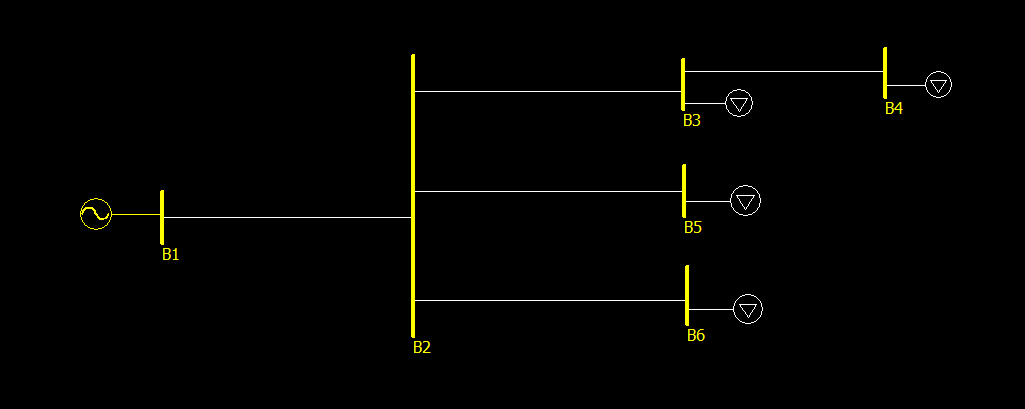

In [1]:
#Libries Importing Secction
import math
import numpy as np
import cmath 
# https://docs.python.org/2/library/cmath.html

## Data definition

In [2]:
h = 3 + 4j
y = np.cdouble(3 + (4/3)*1j)
print(abs(h))
print(np.absolute(h))
print(cmath.phase(h))
print(np.angle(y))
print(h.conjugate())
np.conj(h)

5.0
5.0
0.9272952180016122
0.41822432957922906
(3-4j)


(3-4j)

In [3]:
print(math.sqrt(3),np.sqrt(3))

1.7320508075688772 1.7320508075688772


In [4]:
    #Scale
k = K = 1000 #KILO
M = k*k #mega
n = 1/(M*k) #nano 
m = 1/M #micro
    # nominal voltage 138/sqrt(3) kv
V1 = 138*k/math.sqrt(3) + 0j 
    #Impedance per kilometer
Impedance_per_kilometer = 0.04 + 0.2j 
    #length of the network between Bn and Bm
L12 = 20
L23 = 32
L25 = 28
L26 = 48
L34 = 16
    #load Data
S3 = (5 - 10/3j)*M #Power constant
S4 = (20/3 - 12/3j)*M #Impedance constant
S5 = (40/3 - 30/3j)*M # Current cosntant
S6 = (50/3 - 35/3j)*M #Power constant
print(S3,S4,S5,S6)

(5000000+3333333.3333333335j) (6666666.666666667+4000000j) (13333333.333333334+10000000j) (16666666.666666668+11666666.666666666j)


In [5]:
Z12 = L12*Impedance_per_kilometer
Z23 = L23*Impedance_per_kilometer
Z25 = L25*Impedance_per_kilometer
Z26 = L26*Impedance_per_kilometer
Z34 = L34*Impedance_per_kilometer
print(Z12,Z23,Z25,Z26,Z34)

(0.8+4j) (1.28+6.4j) (1.12+5.6000000000000005j) (1.92+9.600000000000001j) (0.64+3.2j)


In [6]:
print((S6))
print((Z12))
print((Z23))
print((Z25))
print((Z26))
print((Z34))
print(abs(V1))

(16666666.666666668+11666666.666666666j)
(0.8+4j)
(1.28+6.4j)
(1.12+5.6000000000000005j)
(1.92+9.600000000000001j)
(0.64+3.2j)
79674.33714816836


## Questions (Portuguese)

* Qual é o valor da tensão mínima na rede, em porcentagem da tensão nominal?
* Qual é o valor da perda ativa total, em [MW]?
* Qual é o valor da corrente na linha B1 – B2, em [A]?
* Qual é o valor da corrente efetivamente absorvida pela carga da barra B6, em [A]?
* Qual é o valor da potência ativa efetivamente absorvida pela carga da barra B3, em [MW]?
* Qual é o valor da potência ativa efetivamente absorvida pela carga da barra B4, em [MW]?

## Analysis



### Algorithm to power or current constant loads

**Text**

* 1) adopt the load voltage equals to the nominal system voltage
* 2) calculate the current using the Power especification and the kick voltage adopted
* 3) calculate the voltage drop along the network using Z*i and the new value of voltage on load by Vnew = Vsystem - Z*i 
* 4) Verify step 
    if abs(Vnew - Vlest_kick < error_tolerable)
        Stop algorith
    else
        Back to the secound step
        
**High level algorithm abstraction**

 * V_guess = Vsystem
 * Vnew = -10000000 #Number to define that (V_guess != Vnew)
 * wilhe( abs(V_guess - Vnew)>error )
 * ____  I = (S/V_guess).conjugate()
 * ____  V_drop = Zline*I
 * ____  Vnew = Vsystem - V_drop
     
     

In [7]:
#Initial guess
V4 = V3 = V5 = V6 = V1   


In [8]:
#Modeling Loads and finding currenrts

#Explanation
    #We need to discover the real value of voltage on terminals but we have 
    #only the voltage of the generator at B1 bar. So to discover the voltage
    #drop we need know the currents in each line of the network.
    #So we will calculate this values:

#B3 Power constant 
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++
I30 = (S3/V3).conjugate()
    # constant
I30ABS = abs(I30)
theta30 = cmath.phase(I30) 

phi30 = cmath.phase(V1) - theta30

#B4 Impedance constant 
#++++++++++++++++++++++++++++++++++++++++++++++++++++
Z40 = (V1*(V1.conjugate()))/S4.conjugate()   #print(polar(Z4)) , V1 = Vnf

I40 = V4/Z40  
#B5 current constant 
#++++++++++++++++++++++++++++++++++++++++++++++++++++++
I50 = (S5/V1).conjugate()
    # constant
I50ABS = abs(I50)
theta50 = cmath.phase(I50)

phi50 = cmath.phase(V1) - theta50

#B6 Power constant 
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++
I60 = (S6/V1).conjugate()
    # constant
I60ABS = abs(I60)
theta60 = cmath.phase(I60)

phi60 = cmath.phase(V1) - theta60


In [10]:
def comparasion(V3,V4,V5,V6,VAUX3,VAUX4,VAUX5):
    if(abs(VAUX3 - V3) < m and (cmath.phase(VAUX3) - cmath.phase(V3) < m)):
        if(abs(VAUX4 - V4) < m and (cmath.phase(VAUX4) - cmath.phase(V4) < m)):
            if(abs(VAUX5 - V5) < m and (cmath.phase(VAUX5) - cmath.phase(V5) < m)):
                if(abs(VAUX6 - V6) < m and (cmath.phase(VAUX6) - cmath.phase(V6) < m)):
                    return 0
    else:
        return 1

In [11]:
#Iterating the algorithm
VAUX3 = VAUX4 = VAUX5 = VAUX6 = -1 #-M*M is a "impossible numeber" to start the iteration
iterations = 0
#while (comparasion(V3,V4,V5,V6,VAUX3,VAUX4,VAUX5) or iterations == 60):
for i in range(72):
    #Saving previous voltage values applied to loads
   # VAUX3 = V3
   # VAUX4 = V4
   # VAUX5 = V5
   # VAUX6 = V6
    
    #Fiding all the currents on the network using our initial kick and its consequences
    #(Node kirchhoff's law)
    I34 = I40
    I23 = I40 + I30
    I25 = I50
    I26 = I60
    I12 = I23 + I25 + I26
    
    #Calculating Voltage drop (Ohm's law)
    V12 = Z12*I12
    V23 = Z23*I23
    V25 = Z25*I25
    V26 = Z26*I26
    V34 = Z34*I34
    
    #Calculating New voltage considering voltage drop
    V2 = V1 - V12
    V3 = V2 - V23
    V4 = V3 - V34
    V5 = V2 - V25
    V6 = V2 - V26
    
    #Calculating new current acording to load model
    I30 = (S3/V3).conjugate()
    I40 = V4/Z40  
    I50 = cmath.rect(I50ABS,cmath.phase(V5) - phi50)
    I60 = (S6/V6).conjugate()
    iterations+=1
print(iterations)

72


In [24]:
#Assumindo que conhecemos tudo 
#As respostas do ep:
def ep0(V1,V2,V3,V4,V5,V6,I12,I23,I25,I26,I34,I30,I50,I60,I40,S3,S4,S5,S6,Z12,Z26):
    #Questao1
    Vmin = min(abs(V3),abs(V4),abs(V5),abs(V6))
    print('Valor da tensao minima na rede em % =', (Vmin/abs(V1))*100)
    #Questao2
    P12 = (V1-V2)*(I12.conjugate()) 
    P26 = (V2-V6)*(I26.conjugate()) 
    P60 = S6 
    P25 = (V2-V5)*(I25.conjugate()) 
    P50 = V5*(I25.conjugate())
    P23 = (V2-V3)*(I23.conjugate())
    P30 = S3
    P34 = (V3-V4)*(I34.conjugate())
    P40 = (V4)*I34.conjugate()
    Ptotal = ((P12+P26+P25+P23+P34).real)/M
    Pt = ((P12+P26+P25+P23+P34+P60+P50+P30+P40).real)/M
    #print(P12,P26,P25,P23,P26,P34)
    print("Valor da perda ativa total na linha = {} MW".format(Ptotal))
    print("Valor da perda ativa total em tudo = {} MW".format(Pt))
    #Questao3
    print('Corrente na linha B1-B2 em A = {}'.format(I12))
    #Questao4
    print('Corrente na carga B6 =',I60)
    #Questao5
    print('Potencia ativa em na carga em B3 =',(((V3*(I30.conjugate())).real))/M)
    #Questao6
    print('Potencia ativa em na carga em B4 =',(((V4*(I40.conjugate())).real))/M)
    

In [25]:
ep0(V1,V2,V3,V4,V5,V6,I12,I23,I25,I26,I34,I30,I50,I60,I40,S3,S4,S5,S6,Z12,Z26)

Valor da tensao minima na rede em % = 95.12813446947717
Valor da perda ativa total na linha = 0.5681743477021347 MW
Valor da perda ativa total em tudo = 41.27323084516219 MW
Corrente na linha B1-B2 em A = (518.0241508430425-391.49672546333437j)
Corrente na carga B6 = (212.58748898224187-163.87713131124124j)
Potencia ativa em na carga em B3 = 5.000000000000001
Potencia ativa em na carga em B4 = 6.182813430907326
